In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.optimize import minimize

df = pd.read_csv("Training Data_Case 3.csv")
df = df.rename(columns={'Unnamed: 0': 'date'})
df.set_index('date', inplace=True)

# Calculate the number of rows in df_train
train_size = int(len(df) * 0.9)

# Split the data into df_train and df_test
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]


print(df.head())

           A       B      C      D      E      F      G      H      I       J
date                                                                         
1     119.96  198.25  76.54  32.08  53.20  19.47  40.63  43.47  19.76  113.91
2     120.32  201.42  76.73  31.86  53.88  19.23  40.47  45.16  19.88  112.98
3     119.60  200.23  77.60  31.56  55.11  18.93  39.84  46.03  20.29  114.24
4     121.76  199.61  79.48  31.62  55.80  19.15  40.13  46.89  20.01  114.27
5     120.10  199.64  81.49  31.89  55.02  19.16  39.94  47.59  20.12  113.87


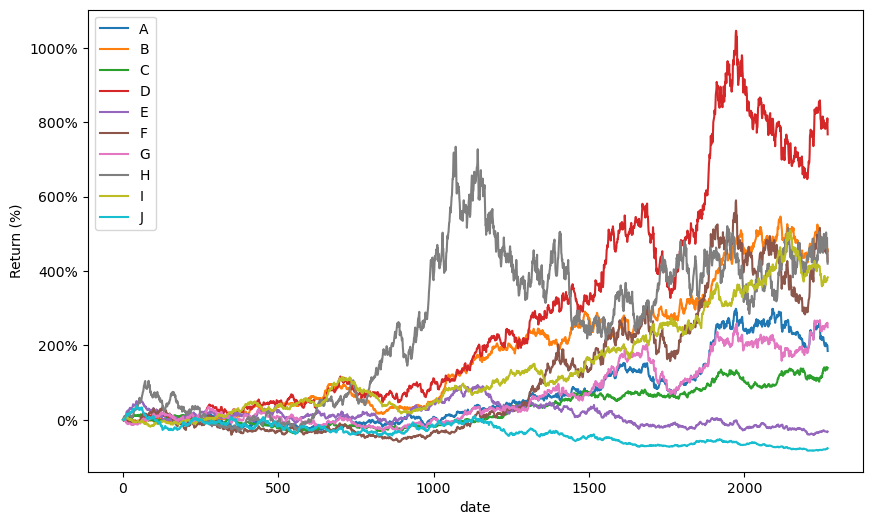

In [24]:
# Plot the returns for each asset
returns = (df_train / df_train.iloc[0]) - 1
ax = returns.plot(figsize=(10, 6))
ax.set_ylabel('Return (%)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
plt.show()

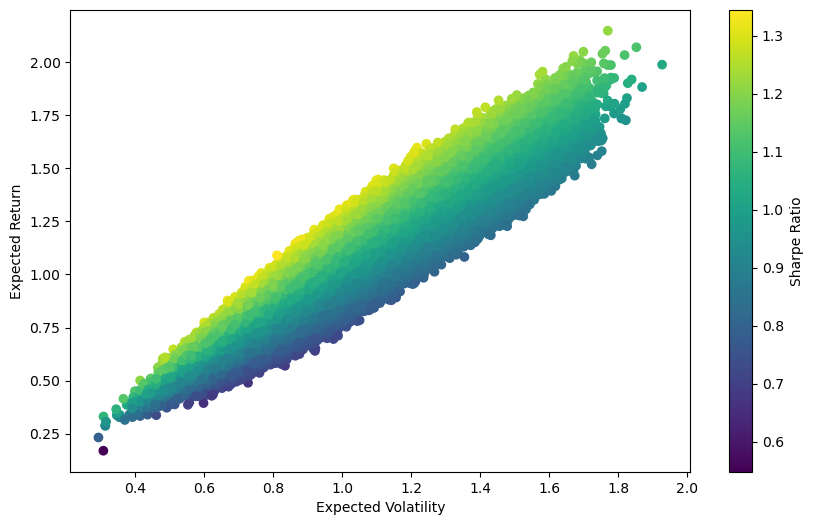

Optimal weights:
 A    0.017311
B    0.004077
C    0.007910
D    0.026802
E    0.427443
F    0.067697
G    0.031667
H    0.293259
I    0.084488
J    0.039345
Name: 964377, dtype: float64


In [34]:
# Plot efficient frontier with random weights
num_portfolios = 1000000

expected_returns = returns.mean()
cov_matrix_norm = returns.cov()

all_weights = pd.DataFrame(np.zeros((num_portfolios, len(df.columns))), columns=df.columns)
port_returns = np.zeros(num_portfolios)
port_volatility = np.zeros(num_portfolios)
sharpe_ratio = np.zeros(num_portfolios)

for i in range(num_portfolios):
    weights = np.random.random(len(df.columns))
    weights /= np.sum(weights)
    all_weights.iloc[i] = weights
    
    port_returns[i] = np.sum(expected_returns * weights)
    port_volatility[i] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_norm, weights)))
    sharpe_ratio[i] = port_returns[i] / port_volatility[i]

max_sharpe_ratio_idx = sharpe_ratio.argmax()

plt.figure(figsize=(10, 6))
plt.scatter(port_volatility, port_returns, c=sharpe_ratio, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

plt.show()


print('Optimal weights:\n', all_weights.iloc[max_sharpe_ratio_idx])

In [41]:
def allocate_portfolio(asset_prices):
    return all_weights.iloc[max_sharpe_ratio_idx]

In [42]:
def grading(testing): 
    weights = np.full(shape=(len(testing.index),10), fill_value=0.0)
    for i in range(0,len(testing)):
        unnormed = np.array(allocate_portfolio(df_train))
        positive = np.absolute(unnormed)
        normed = positive/np.sum(positive)
        weights[i]=list(normed)
    capital = [1]
    for i in range(len(testing) - 1):
        shares = capital[-1] * np.array(weights[i]) / np.array(testing.iloc[i,:])
        capital.append(float(np.matmul(np.reshape(shares, (1,10)),np.array(testing.iloc[i+1,:]))))
    returns = (np.array(capital[1:]) - np.array(capital[:-1]))/np.array(capital[:-1])
    return np.mean(returns)/ np.std(returns) * (252 ** 0.5), capital, weights

grading(df_test)

(1.835893975723288,
 [1,
  0.9918651843128004,
  0.9717378370165466,
  0.9493039206391143,
  0.9472703969203975,
  0.9451172448054902,
  0.9630148320976278,
  0.9712908072789633,
  0.9823035717386562,
  0.9656936849374663,
  0.9817672131595118,
  0.9964964468553065,
  0.9688365336423486,
  0.9727339098511395,
  0.9686618686768618,
  0.9634569592326222,
  0.9574133307046715,
  0.9563694177999431,
  0.9402520333039367,
  0.9181338771598393,
  0.9145477506526721,
  0.9265589456848319,
  0.9463005903170159,
  0.9578004666211075,
  0.9584871346756045,
  0.9468890977686728,
  0.9334399378201051,
  0.9361966048732799,
  0.9434504444137297,
  0.9391818834444716,
  0.9303653390354022,
  0.9358309685628718,
  0.9375141179076152,
  0.9268102564396153,
  0.9209362581254681,
  0.9214975218016386,
  0.9245001446720917,
  0.9305555251639931,
  0.9207894715387509,
  0.9143705251214177,
  0.9251623601988019,
  0.9015730443465837,
  0.9082609409726493,
  0.9199871060150906,
  0.9079634008944082,
  0.902